Copyright Amazon.com, Inc. or its affiliates. All Rights Reserved.

SPDX-License-Identifier: Apache-2.0

# Visualize the dynamic graph using Networkx

This notebook provides visualizes the dynamic graph using Network X. The nodes are customers and merchants, and the edges are transactions between them.

## Table of Contents
1. Load processed node and edge data
2. Load node attributes from raw data
3. Build graph with networkx and visualize a specific snapshot


In [1]:
import sys 
sys.path.append('../../src/anomaly_detection_spatial_temporal_data/')

In [2]:
import pandas as pd
import numpy as np
from visualization.dynamic_graph import DynamicHomoGraph

In [3]:
#rerun this cell again if your plot looks very small
from matplotlib import pyplot as plt
import matplotlib

font = {'family': 'normal', 'size': 18}
matplotlib.rc('font', **font)

import matplotlib.cm as cm
plt.rcParams["figure.figsize"] = (30,18)

## Load node and edge data from 1.1 processing notebook

In [4]:
edge_list_w_label_filepath = '../../data/02_intermediate/financial_fraud/edge_list.npz'
node_id_mapping_filepath = '../../data/02_intermediate/financial_fraud/node_id.csv'

In [5]:
edge_list = np.load(edge_list_w_label_filepath)

node_id = pd.read_csv(node_id_mapping_filepath)

## Load node attribute value 

The customer/merchant IDs are used to color the nodes in the visualization.

In [6]:
raw_data_path = '../../data/01_raw/financial_fraud/bs140513_032310.csv'

raw_trans_data = pd.read_csv(raw_data_path)

In [8]:
customer_attribute_data = raw_trans_data[['step','customer','age','gender','zipcodeOri']]
merchant_attribute_data = raw_trans_data[['step','merchant','zipMerchant','category']]

In [9]:
# customer_attribute_data.head(10)

In [10]:
# merchant_attribute_data.head(10)

In [11]:
customer_attribute_data_deduped = customer_attribute_data.drop_duplicates(subset=['customer'], keep='last', )
merchant_attribute_data_deduped = merchant_attribute_data.drop_duplicates(subset=['merchant'], keep='last', )

In [12]:
# customer_attribute_data.shape, customer_attribute_data_deduped.shape

In [13]:
# merchant_attribute_data.shape, merchant_attribute_data_deduped.shape

## Build graph with networkx and visualize a specific snapshot

In [14]:
dynamic_payment_network = DynamicHomoGraph(
    node_id, edge_list['data'], 
    src_node_attribute=customer_attribute_data_deduped, 
    dst_node_attribute=merchant_attribute_data_deduped, 
    load_time_steps=10
)

Generating node static attribute...
Done!
Loading time step 0...

Loading time step 1...

Loading time step 2...

Loading time step 3...

Loading time step 4...

Loading time step 5...

Loading time step 6...

Loading time step 7...

Loading time step 8...

Loading time step 9...



In [15]:
# dynamic_payment_network._determine_object_type(4112)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


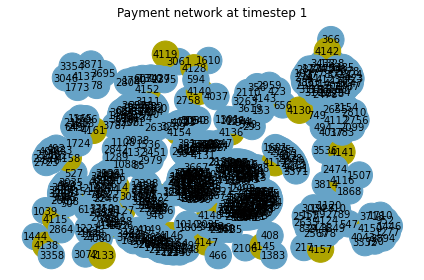

In [16]:
dynamic_payment_network.draw_nx_graph_w_edge_label_at_specific_time(1)

#### check some edge label

In [17]:
edge_list['data'][np.where((edge_list['data'][:,0]==1444)&(edge_list['data'][:,1]==4138))[0], :],edge_list['data'][np.where((edge_list['data'][:,0]==3358)&(edge_list['data'][:,1]==4138))[0], :]

(array([[1444, 4138,    1]], dtype=int32),
 array([[3358, 4138,    0]], dtype=int32))

#### check node features

In [18]:
dynamic_payment_network.src_node_static_attribute[1444],dynamic_payment_network.dst_node_static_attribute[4138]

({'customer': "'C1667161948'",
  'age': "'3'",
  'gender': "'M'",
  'zipcodeOri': "'28007'"},
 {'merchant': "'M2080407379'",
  'zipMerchant': "'28007'",
  'category': "'es_travel'"})

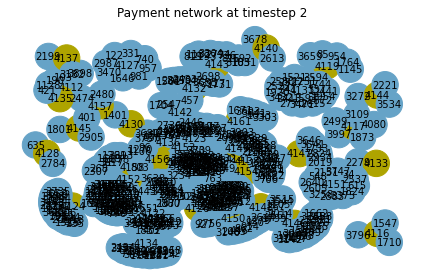

In [19]:
# plot a different snapshot
dynamic_payment_network.draw_nx_graph_w_edge_label_at_specific_time(2)